In [49]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf

## Data Processing 

In [50]:
data_global_temp = pd.read_csv("annual_csv.csv")

In [51]:
print(data_global_temp)

      Source  Year    Mean
0       GCAG  2016  0.9363
1    GISTEMP  2016  0.9900
2       GCAG  2015  0.8998
3    GISTEMP  2015  0.8700
4       GCAG  2014  0.7408
..       ...   ...     ...
269  GISTEMP  1882 -0.1000
270     GCAG  1881 -0.0628
271  GISTEMP  1881 -0.1200
272     GCAG  1880 -0.1148
273  GISTEMP  1880 -0.2000

[274 rows x 3 columns]


In [52]:
data_global_temp = data_global_temp[data_global_temp['Source'] == 'GISTEMP'].reset_index()[["Source", "Year", "Mean"]]

In [53]:
print(data_global_temp)

      Source  Year  Mean
0    GISTEMP  2016  0.99
1    GISTEMP  2015  0.87
2    GISTEMP  2014  0.74
3    GISTEMP  2013  0.65
4    GISTEMP  2012  0.63
..       ...   ...   ...
132  GISTEMP  1884 -0.28
133  GISTEMP  1883 -0.21
134  GISTEMP  1882 -0.10
135  GISTEMP  1881 -0.12
136  GISTEMP  1880 -0.20

[137 rows x 3 columns]


## Average Mean Tempeture Plot 

Text(0.5, 1.0, 'Average Mean Temp')

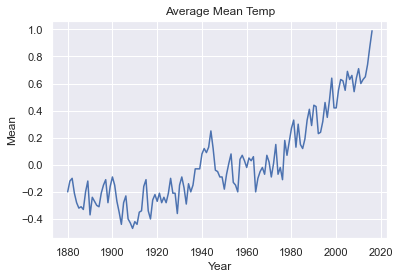

In [54]:
sns.set()
sns.lineplot(x = data_global_temp["Year"], y = data_global_temp["Mean"]).set_title("Average Mean Temp")

## Data For Rice Yields Per Year By Country

In [55]:
data_rice = pd.read_csv("rice-yields.csv",keep_default_na=False)

In [56]:
data_rice.head()

,Entity,Code,Year,Yield
0,Afghanistan,AFG,1961,1.0831
1,Afghanistan,AFG,1962,1.0480
2,Afghanistan,AFG,1963,0.9548
3,Afghanistan,AFG,1964,1.0461
4,Afghanistan,AFG,1965,1.0621


In [57]:
print(set(data_rice["Entity"].values))
print("NUMBER OF REGIONS: ", len(set(data_rice["Entity"].values)))

{'Oceania', 'Kuwait', 'Northern America', 'Cape Verde', 'Nigeria', 'Bolivia', 'El Salvador', 'USSR', 'European Union', 'Haiti', 'Chad', 'Morocco', 'Hong Kong', 'Nepal', 'Norway', 'South America', 'Low Income Food Deficit Countries', 'AsiaCentral', 'Africa', 'Iceland', 'Democratic Republic of Congo', 'Kyrgyzstan', 'Caribbean', 'Iran', 'India', 'Mongolia', 'Taiwan', 'Colombia', 'EuropeWestern', 'Eastern Asia', 'Niger', 'Djibouti', 'Ireland', 'Papua New Guinea', 'Oman', 'World', 'Serbia', 'Belize', 'Angola', 'Sudan (former)', 'Timor', 'New Zealand', 'Turkey', 'Australia', 'Honduras', 'Benin', 'Australia & New Zealand', 'Serbia and Montenegro', 'Syria', 'South Africa', 'Togo', 'Palestine', 'Mali', 'Guam', 'Switzerland', 'Montserrat', 'Ethiopia PDR', 'Turkmenistan', 'Czechia', 'Malawi', 'Laos', 'Brazil', 'Namibia', 'Spain', 'Albania', 'Poland', 'Moldova', 'Kenya', 'Lithuania', 'Belarus', 'Central African Republic', 'Ecuador', 'Pakistan', 'Cyprus', 'Uzbekistan', 'United States', 'Dominican R

## Rice Yields For Selected Country

In [58]:
data_nigeria = data_rice[data_rice["Entity"] == "Nigeria"].reset_index()[["Entity", "Code", "Year","Yield"]]
print(data_nigeria.head())

    Entity Code  Year   Yield
0  Nigeria  NGA  1961  0.7388
1  Nigeria  NGA  1962  0.7747
2  Nigeria  NGA  1963  0.7577
3  Nigeria  NGA  1964  0.7113
4  Nigeria  NGA  1965  0.6808


Text(0.5, 1.0, 'Yield per Year')

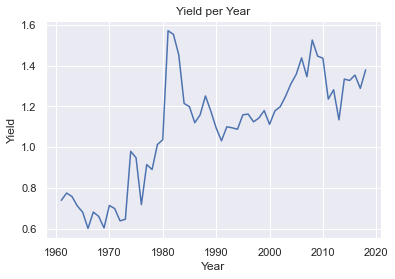

In [59]:
sns.lineplot(x = data_nigeria["Year"], y = data_nigeria["Yield"]).set_title("Yield per Year")

# Yield Per Year And Tempeture Per Year Plot

Text(0.5, 1.0, 'Yield Per Year and Global Temp')

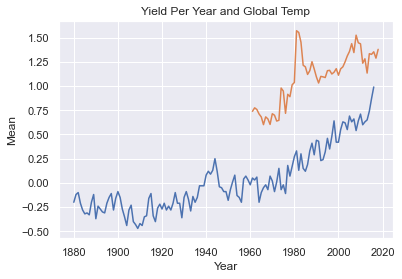

In [60]:
sns.set()
sns.lineplot(x = data_global_temp["Year"],y = data_global_temp["Mean"])
sns.lineplot(x = data_nigeria["Year"], y = data_nigeria["Yield"]).set_title("Yield Per Year and Global Temp")

# Preprocess Data For ML

In [61]:
data_global_temp_new = data_global_temp.iloc[0:56,1:]

In [62]:
data_global_temp_new

,Year,Mean
0,2016,0.99
1,2015,0.87
2,2014,0.74
3,2013,0.65
4,2012,0.63
5,2011,0.60
6,2010,0.71
7,2009,0.64
8,2008,0.54
9,2007,0.66


In [88]:
 yields_and_mean = pd.merge(data_global_temp_new, data_rice)


In [89]:
yields_and_mean

,Year,Mean,Entity,Code,Yield
0,2016,0.99,Afghanistan,AFG,1.9394
1,2016,0.99,Africa,,1.4073
2,2016,0.99,Albania,ALB,4.7164
3,2016,0.99,Algeria,DZA,1.0203
4,2016,0.99,Americas,,6.1541
...,...,...,...,...,...
11346,1961,0.05,World,OWID_WRL,1.2424
11347,1961,0.05,Yemen,YEM,0.7825
11348,1961,0.05,Yugoslavia,OWID_YGS,1.6540
11349,1961,0.05,Zambia,ZMB,0.8222


In [90]:
yam = yields_and_mean.to_numpy()

In [169]:
print(yam)

[[2016 0.99 'Afghanistan' 'AFG' 1.9394]
 [2016 0.99 'Africa' '' 1.4073]
 [2016 0.99 'Albania' 'ALB' 4.7164]
 ...
 [1961 0.05 'Yugoslavia' 'OWID_YGS' 1.654]
 [1961 0.05 'Zambia' 'ZMB' 0.8222]
 [1961 0.05 'Zimbabwe' 'ZWE' 0.9195]]


In [154]:
x_yam = yields_and_mean.iloc[:,0:3]
first_column = x_yam.pop('Entity')
x_yam.insert(0, 'Entity', first_column)

In [155]:
y_yam = yields_and_mean.iloc[:,-1]

In [156]:
x_yam = x_yam.to_numpy()
y_yam = y_yam.to_numpy()

In [157]:
print(x_yam)

[['Afghanistan' 2016 0.99]
 ['Africa' 2016 0.99]
 ['Albania' 2016 0.99]
 ...
 ['Yugoslavia' 1961 0.05]
 ['Zambia' 1961 0.05]
 ['Zimbabwe' 1961 0.05]]


In [158]:
print(y_yam)

[1.94 1.41 4.72 ... 1.65 0.82 0.92]


In [159]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse = False), [0])], remainder='passthrough')
x_yam = (ct.fit_transform(x_yam))

In [160]:
print(x_yam)

[[1.0 0.0 0.0 ... 0.0 2016 0.99]
 [0.0 1.0 0.0 ... 0.0 2016 0.99]
 [0.0 0.0 1.0 ... 0.0 2016 0.99]
 ...
 [0.0 0.0 0.0 ... 0.0 1961 0.05]
 [0.0 0.0 0.0 ... 0.0 1961 0.05]
 [0.0 0.0 0.0 ... 1.0 1961 0.05]]


## Test And Train Sets

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_yam, y_yam, test_size = 0.2, random_state = 0)

In [162]:
x_train

array([[0.0, 0.0, 0.0, ..., 0.0, 2011, 0.6],
       [0.0, 0.0, 0.0, ..., 0.0, 1988, 0.41],
       [0.0, 0.0, 0.0, ..., 0.0, 1983, 0.3],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 1968, -0.07],
       [0.0, 0.0, 0.0, ..., 0.0, 1963, 0.06],
       [0.0, 0.0, 0.0, ..., 0.0, 2004, 0.55]], dtype=object)

In [163]:
y_train

array([4.4 , 1.24, 2.83, ..., 3.34, 0.62, 3.07])

## Multiple Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [165]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.85 2.59]
 [1.37 0.66]
 [1.81 1.7 ]
 ...
 [1.75 1.38]
 [4.55 5.08]
 [1.68 1.23]]
